# Clustering

## Imports

In [61]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import zscore
from sklearn import cluster
from sklearn.cluster import DBSCAN
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import NearestNeighbors
from sklearn.metrics import silhouette_score


In [62]:
data = pd.read_csv('Preprocessed.csv')

In [63]:
data.head()

,Age,Gender,University,Department,Year,Current CGPA,Stress value,Anxiety value,Depression value
0,18-22,Female,"Independent University, Bangladesh (IUB)",Engineering - CS,2,2.50 - 2.99,0.760870,0.716667,0.712121
1,18-22,Male,"Independent University, Bangladesh (IUB)",Engineering - CS,3,3.00 - 3.39,0.684783,0.550000,0.712121
2,18-22,Male,American International University Bangladesh (...,Engineering - CS,3,3.00 - 3.39,0.010870,0.000000,0.000000
3,18-22,Male,American International University Bangladesh (...,Engineering - CS,3,3.00 - 3.39,0.489130,0.483333,0.478788
4,18-22,Male,North South University (NSU),Engineering - CS,2,2.50 - 2.99,0.804348,0.633333,0.769697


In [64]:
data.describe()

,Year,Stress value,Anxiety value,Depression value
count,2028.000000,2028.000000,2028.000000,2028.000000
mean,2.311144,0.585038,0.585585,0.529380
std,1.190877,0.198531,0.260009,0.249647
min,0.000000,0.000000,0.000000,0.000000
25%,1.000000,0.456522,0.383333,0.333333
50%,2.000000,0.586957,0.600000,0.527273
75%,3.000000,0.750000,0.800000,0.715152
max,4.000000,1.000000,1.000000,1.000000


## K-Means

We decided to make a cluster analysis between Depression and Anxiety. We use the Elbow Method to find out the number of clusters needed

Text(0, 0.5, 'SSE')

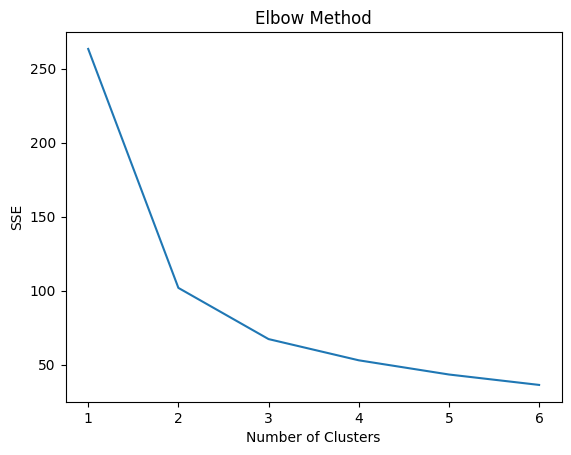

In [65]:
num_clusters = [1,2,3,4,5,6]
SSE = []

for k in num_clusters:
    k_means = cluster.KMeans(n_clusters=k, init='k-means++', n_init=10, random_state=0)
    k_means.fit(data[['Depression value', 'Anxiety value']])
    SSE.append(k_means.inertia_)

plt.plot(num_clusters, SSE)
plt.title('Elbow Method')
plt.xlabel('Number of Clusters')
plt.ylabel('SSE')

In [66]:
kmeans = cluster.KMeans(n_clusters=3, init="k-means++", n_init = 10)
kmeans = kmeans.fit(data[['Depression value', 'Anxiety value']])
kmeans.cluster_centers_

array([[0.80606549, 0.86728395],
       [0.26560699, 0.29833845],
       [0.5295886 , 0.6019426 ]])

We add the cluster number for each tuple to our DataFrame

In [67]:
data['Cluster number'] = kmeans.labels_

In [68]:
data.head()

,Age,Gender,University,Department,Year,Current CGPA,Stress value,Anxiety value,Depression value,Cluster number
0,18-22,Female,"Independent University, Bangladesh (IUB)",Engineering - CS,2,2.50 - 2.99,0.760870,0.716667,0.712121,0
1,18-22,Male,"Independent University, Bangladesh (IUB)",Engineering - CS,3,3.00 - 3.39,0.684783,0.550000,0.712121,2
2,18-22,Male,American International University Bangladesh (...,Engineering - CS,3,3.00 - 3.39,0.010870,0.000000,0.000000,1
3,18-22,Male,American International University Bangladesh (...,Engineering - CS,3,3.00 - 3.39,0.489130,0.483333,0.478788,2
4,18-22,Male,North South University (NSU),Engineering - CS,2,2.50 - 2.99,0.804348,0.633333,0.769697,0


<Axes: xlabel='Depression value', ylabel='Anxiety value'>

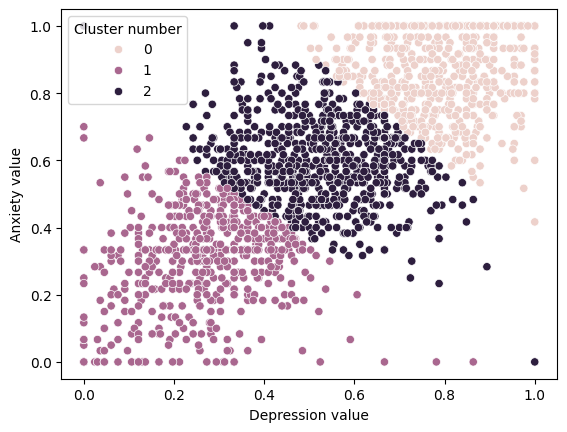

In [69]:
sns.scatterplot(data=data, x='Depression value', y='Anxiety value', hue='Cluster number')

## DBSCAN

In [70]:
data.head()

,Age,Gender,University,Department,Year,Current CGPA,Stress value,Anxiety value,Depression value,Cluster number
0,18-22,Female,"Independent University, Bangladesh (IUB)",Engineering - CS,2,2.50 - 2.99,0.760870,0.716667,0.712121,0
1,18-22,Male,"Independent University, Bangladesh (IUB)",Engineering - CS,3,3.00 - 3.39,0.684783,0.550000,0.712121,2
2,18-22,Male,American International University Bangladesh (...,Engineering - CS,3,3.00 - 3.39,0.010870,0.000000,0.000000,1
3,18-22,Male,American International University Bangladesh (...,Engineering - CS,3,3.00 - 3.39,0.489130,0.483333,0.478788,2
4,18-22,Male,North South University (NSU),Engineering - CS,2,2.50 - 2.99,0.804348,0.633333,0.769697,0


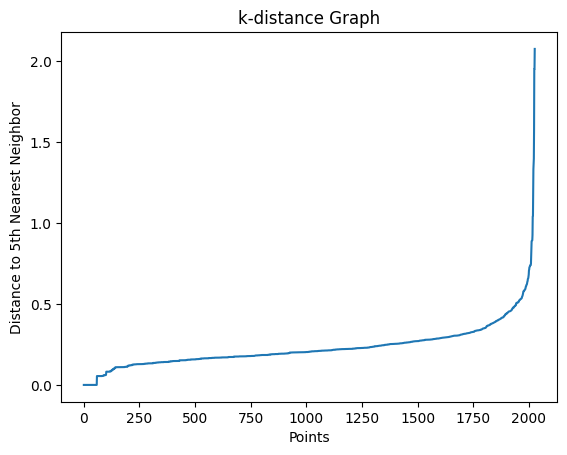

Best eps: 1.5
Best min_samples: 3
Best silhouette score: 0.4568


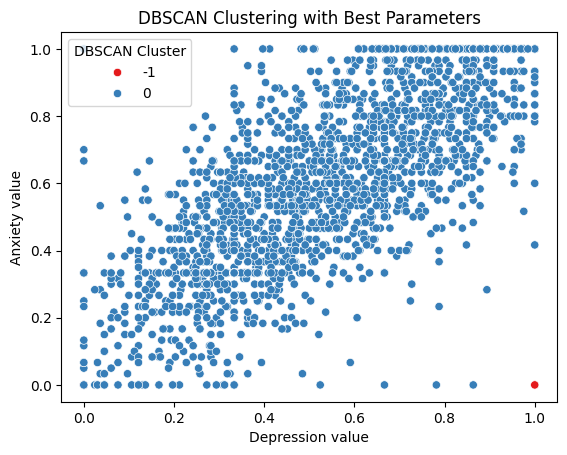

In [71]:
data_normalized = data[['Depression value', 'Anxiety value', 'Stress value']]
scaler = StandardScaler()
data_scaled = scaler.fit_transform(data_normalized)

k = 5
neighbors = NearestNeighbors(n_neighbors=k)
neighbors_fit = neighbors.fit(data_scaled)
distances, indices = neighbors_fit.kneighbors(data_scaled)

distances = np.sort(distances[:, k-1], axis=0)
plt.plot(distances)
plt.title('k-distance Graph')
plt.xlabel('Points')
plt.ylabel('Distance to 5th Nearest Neighbor')
plt.show()

eps_values = np.linspace(0.1, 1.5, 15)
min_samples_values = [3, 4, 5, 6, 7, 8, 10]

best_score = -1
best_eps = None
best_min_samples = None
best_labels = None

for eps in eps_values:
    for min_samples in min_samples_values:
        dbscan = DBSCAN(eps=eps, min_samples=min_samples)
        labels = dbscan.fit_predict(data_scaled)
        if len(set(labels)) == 1:
            continue
        if len(set(labels)) > 1:
            score = silhouette_score(data_scaled, labels)
            if score > best_score:
                best_score = score
                best_eps = eps
                best_min_samples = min_samples
                best_labels = labels

print(f"Best eps: {best_eps}")
print(f"Best min_samples: {best_min_samples}")
print(f"Best silhouette score: {best_score:.4f}")

data['DBSCAN Cluster'] = best_labels
sns.scatterplot(data=data, x='Depression value', y='Anxiety value', hue='DBSCAN Cluster', palette='Set1')
plt.title("DBSCAN Clustering with Best Parameters")
plt.xlabel("Depression value")
plt.ylabel("Anxiety value")
plt.show()

As we can see, DBSCAN is not a good fit for the analysis. 

## K-Means++

Now we do the cluster analysis for three dimesions (Depression value, Stress value and Anxiety value)

Searching best number of clusters using the Elbow Method

Text(0, 0.5, 'SSE')

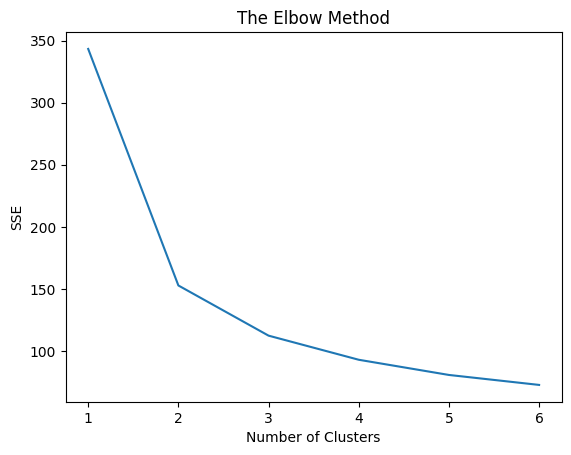

In [72]:
num_clusters = [1,2,3,4,5,6]
SSE = []
for k in num_clusters:
    k_means = cluster.KMeans(n_clusters=k, init='k-means++',random_state=0, n_init=10)
    k_means.fit(data[['Depression value', 'Stress value', 'Anxiety value']])
    SSE.append(k_means.inertia_)

plt.plot(num_clusters, SSE)
plt.title('The Elbow Method')
plt.xlabel('Number of Clusters')
plt.ylabel('SSE')

In [73]:
kmeans_3d = cluster.KMeans(n_clusters=3, init="k-means++", n_init = 10)
kmeans_3d = kmeans.fit(data[['Depression value', 'Stress value', 'Anxiety value']])
kmeans_3d.cluster_centers_

data['Cluster number'] = kmeans.labels_

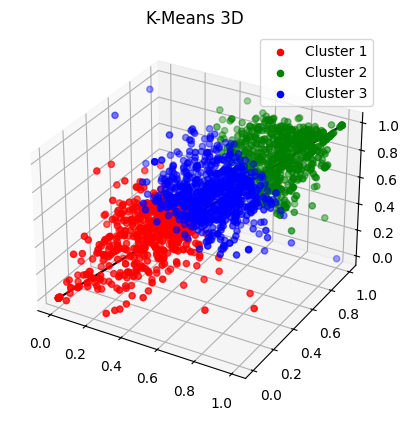

In [74]:
kplot = plt.axes(projection='3d')
xline = np.linspace(0, 1, 1000)
yline = np.linspace(0, 1, 1000)
zline = np.linspace(0, 1, 1000)

kplot.plot3D(xline, yline, zline, 'black')

cluster1 = data[data['Cluster number'] == 0]
cluster2 = data[data['Cluster number'] == 1]
cluster3 = data[data['Cluster number'] == 2]

kplot.scatter3D(cluster1["Depression value"], cluster1["Stress value"], cluster1["Anxiety value"], c='red', label = 'Cluster 1')
kplot.scatter3D(cluster2["Depression value"], cluster2["Stress value"], cluster2["Anxiety value"], c ='green', label = 'Cluster 2')
kplot.scatter3D(cluster3["Depression value"], cluster3["Stress value"], cluster3["Anxiety value"], c ='blue', label = 'Cluster 3')

plt.legend()

plt.title("K-Means 3D")

plt.show()